In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme(style="whitegrid")


In [10]:
df = pd.read_csv("student_performance.csv")
df.head()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [11]:
missing = df.isna().sum()
print("Missing values per column:\n", missing)
nan_rows = df[df.isna().any(axis=1)]
print("\nRows with missing values (up to 10 shown):")
display(nan_rows.head(10))


Missing values per column:
 student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64

Rows with missing values (up to 10 shown):


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade


In [12]:
feature_cols = ["weekly_self_study_hours", "attendance_percentage", "class_participation"]
if "grade_encoded" in df.columns:
    feature_cols.append("grade_encoded")

missing_features = [c for c in feature_cols if c not in df.columns]
if missing_features:
    raise ValueError(f"Expected feature columns not found in dataframe: {missing_features}")

X = df[feature_cols].copy()
y = df["total_score"].copy()       


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train/test shapes:", X_train.shape, X_test.shape)


Train/test shapes: (800000, 3) (200000, 3)


In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv("student_performance.csv")  
print("Shape:", df.shape)
print("\nMissing values per column:")
print(df.isna().sum())

nan_rows = df[df.isna().any(axis=1)]
print("\nNumber of rows with any NaN:", len(nan_rows))
display(nan_rows.head(20))


Shape: (1000000, 6)

Missing values per column:
student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64

Number of rows with any NaN: 0


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade


In [16]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully.")


y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))


coef_df = pd.DataFrame({"feature": feature_cols, "coef": model.coef_})
display(coef_df)


Model trained successfully.
MSE: 80.9352286743695
R2 : 0.6600425865640975


,feature,coef
0,weekly_self_study_hours,1.816820
1,attendance_percentage,0.000402
2,class_participation,-0.002756


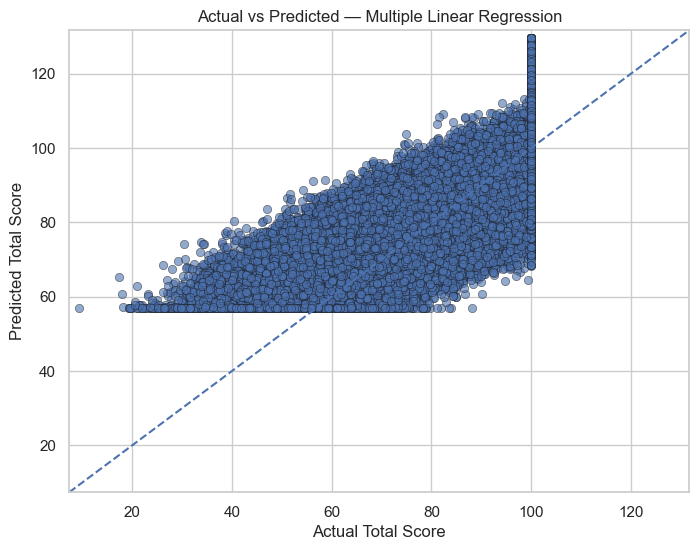

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor= 'k')
lims = [min(y_test.min(), y_pred.min()) - 2, max(y_test.max(), y_pred.max()) + 2]
plt.plot(lims, lims, linestyle='--')
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted — Multiple Linear Regression")
plt.show()


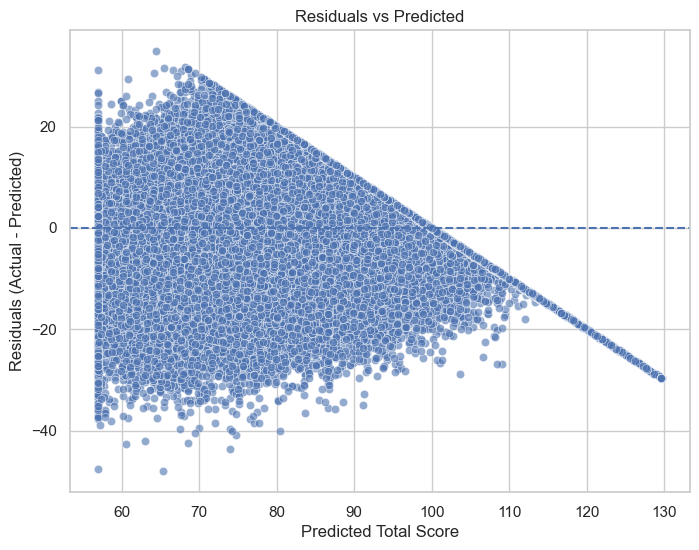

In [18]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Total Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()


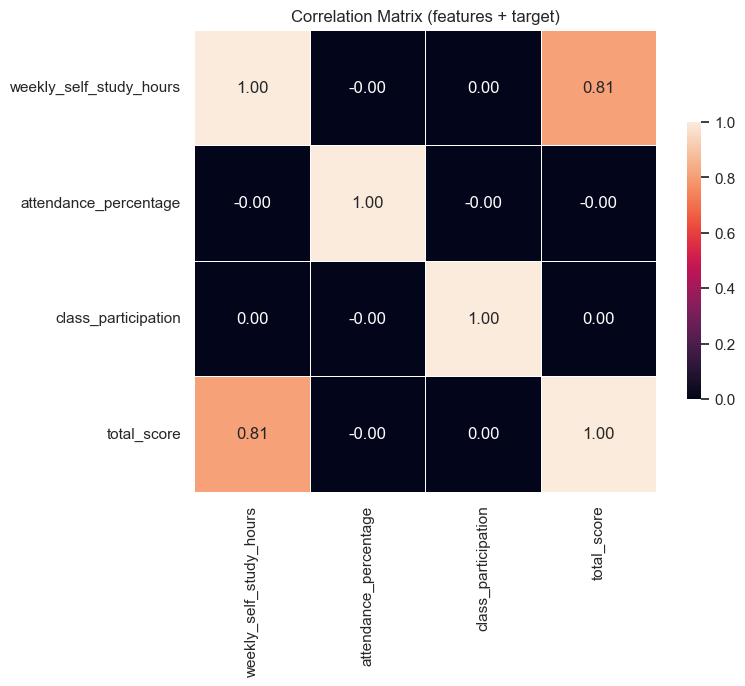

In [19]:
plt.figure(figsize=(8,6))
corr_cols = feature_cols + ["total_score"]
corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink":0.6})
plt.title("Correlation Matrix (features + target)")
plt.show()


In [20]:
# Cell A - diagnostics
import pandas as pd
import numpy as np

df = pd.read_csv("student_performance.csv")  # reload to be safe
print("Shape:", df.shape)
print("\nMissing values per column:")
print(df.isna().sum())

# show up to 20 example rows that contain any NaN
nan_rows = df[df.isna().any(axis=1)]
print("\nNumber of rows with any NaN:", len(nan_rows))
display(nan_rows.head(20))


Shape: (1000000, 6)

Missing values per column:
student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64

Number of rows with any NaN: 0


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade


In [21]:
# Cell B - check grade values
if "grade" in df.columns:
    print("Unique values in grade column:")
    print(df["grade"].unique())
    print("\nValue counts (including NaN):")
    print(df["grade"].value_counts(dropna=False))
else:
    print("No 'grade' column found.")


Unique values in grade column:
['A' 'B' 'C' 'D' 'F']

Value counts (including NaN):
grade
A    548644
B    258174
C    141980
D     44998
F      6204
Name: count, dtype: int64


In [22]:
# Cell C - specific feature NaN counts
feature_cols = ["weekly_self_study_hours","attendance_percentage","class_participation","grade"]
for c in feature_cols:
    if c in df.columns:
        print(c, "-> NaNs:", df[c].isna().sum())
    else:
        print(c, "-> NOT FOUND")


weekly_self_study_hours -> NaNs: 0
attendance_percentage -> NaNs: 0
class_participation -> NaNs: 0
grade -> NaNs: 0


In [23]:
# Cell D - robust imputation & clean mapping
from sklearn.impute import SimpleImputer

# 1) Normalize grade labels (trim whitespace, uppercase) to reduce mapping failures
if "grade" in df.columns:
    df["grade"] = df["grade"].astype(str).str.strip().str.upper().replace({"NAN":"", "NONE":""})
    # Convert empty strings back to NaN
    df["grade"].replace({"": np.nan}, inplace=True)

# 2) Fill grade NaNs with mode (if any)
if "grade" in df.columns:
    if df["grade"].isna().any():
        mode_val = df["grade"].mode(dropna=True)
        if len(mode_val)>0:
            df["grade"].fillna(mode_val[0], inplace=True)
        else:
            df["grade"].fillna("B", inplace=True)  # fallback

# 3) Map grades to ordinal numbers, but first check what labels exist
grade_map = {"A": 4, "B": 3, "C": 2, "D": 1}
if "grade" in df.columns:
    unknown_grades = set(df["grade"].unique()) - set(grade_map.keys())
    if unknown_grades:
        print("Warning: unknown grade labels found:", unknown_grades)
        # Replace unknowns with mode to be safe
        mode_val = df["grade"].mode(dropna=True)[0]
        df["grade"] = df["grade"].apply(lambda x: x if x in grade_map else mode_val)
    df["grade_encoded"] = df["grade"].map(grade_map)

# 4) Impute numeric columns with mean (exclude id-like fields)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in ["student_id","id","index"]:
    if col in numeric_cols:
        numeric_cols.remove(col)

# If total_score must remain target, keep it; still imputing numeric NaNs is okay.
num_imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# 5) Final check
print("\nAfter imputation, missing counts:")
print(df.isna().sum())


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_22340\658601606.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["grade"].replace({"": np.nan}, inplace=True)



After imputation, missing counts:
student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
grade_encoded              0
dtype: int64


In [24]:
# Cell E - prepare X/y, split, scale, and check NaNs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Choose features (use grade_encoded instead of grade)
feature_cols = []
for c in ["weekly_self_study_hours","attendance_percentage","class_participation","grade_encoded"]:
    if c in df.columns:
        feature_cols.append(c)
    else:
        print(f"Note: {c} not found and will be skipped if missing.")

print("Using features:", feature_cols)

X = df[feature_cols].copy()
y = df["total_score"].copy()

# show any remaining NaNs in X
print("\nNaNs in X before split:\n", X.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("\nShapes -> X_train:", X_train.shape, "X_test:", X_test.shape)
print("NaNs in X_train (per column):\n", X_train.isna().sum())
print("NaNs in X_test (per column):\n", X_test.isna().sum())

# Scale
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_cols, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=feature_cols, index=X_test.index)

print("\nAfter scaling, any NaNs in X_train_scaled?", X_train_scaled.isna().any().any())
print("After scaling, any NaNs in X_test_scaled?", X_test_scaled.isna().any().any())

# If still NaNs exist (very unlikely now), drop rows as last resort:
if X_train_scaled.isna().any().any() or X_test_scaled.isna().any().any():
    print("Warning: NaNs still present after imputation+scaling. Dropping rows with NaNs.")
    # align y as well when dropping
    train_keep = ~X_train_scaled.isna().any(axis=1)
    test_keep  = ~X_test_scaled.isna().any(axis=1)
    X_train_scaled = X_train_scaled.loc[train_keep]
    y_train = y_train.loc[train_keep]
    X_test_scaled  = X_test_scaled.loc[test_keep]
    y_test = y_test.loc[test_keep]
    print("New shapes -> X_train_scaled:", X_train_scaled.shape, "X_test_scaled:", X_test_scaled.shape)


Using features: ['weekly_self_study_hours', 'attendance_percentage', 'class_participation', 'grade_encoded']

NaNs in X before split:
 weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
grade_encoded              0
dtype: int64

Shapes -> X_train: (800000, 4) X_test: (200000, 4)
NaNs in X_train (per column):
 weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
grade_encoded              0
dtype: int64
NaNs in X_test (per column):
 weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
grade_encoded              0
dtype: int64

After scaling, any NaNs in X_train_scaled? False
After scaling, any NaNs in X_test_scaled? False


In [25]:
# Cell F - fit model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("Model trained successfully.")

# quick evaluate
y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

# Coefficients
coef_df = pd.DataFrame({"feature": feature_cols, "coef": model.coef_})
display(coef_df)


Model trained successfully.
MSE: 31.481806468899162
R2 : 0.867764956339144


,feature,coef
0,weekly_self_study_hours,5.244493
1,attendance_percentage,-0.003531
2,class_participation,-0.001721
3,grade_encoded,10.152577


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_22340\2538704591.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, palette="coolwarm")


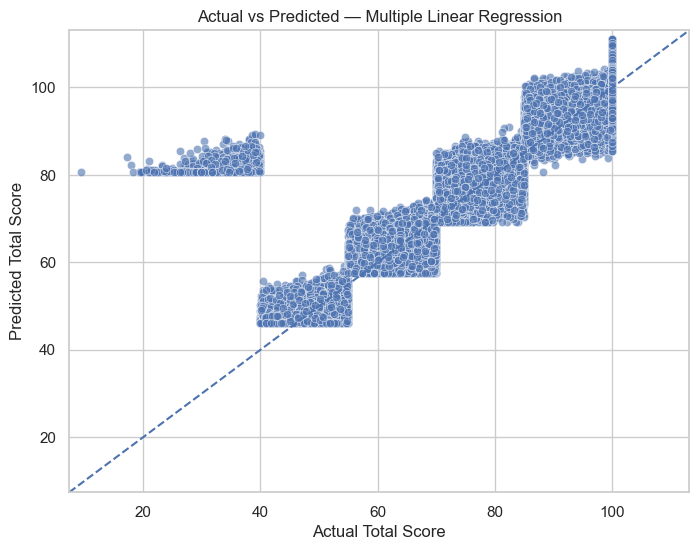

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, palette="coolwarm")
lims = [min(y_test.min(), y_pred.min()) - 2, max(y_test.max(), y_pred.max()) + 2]
plt.plot(lims, lims, linestyle='--')
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted — Multiple Linear Regression")
plt.show()
